# 버스 운행시간 예측 프로젝트

* id - 해당 데이터에서의 고유한 ID(train, test와의 중복은 없음.)
* date - 버스 운행 날짜
* route_id - 버스 노선 ID
* vh_id - 버스 ID
* route_nm - 버스 노선 실제 번호
* now_latitude - 현재 정류소의 위도
* now_longitude - 현재 정류소의 경도
* now_station - 현재 정류소 이름
* now_arrive_time - 현재 정류장에 도착한 시간
* distance - 현재 정류장에서 다음 정류장까지 실제 이동한 거리
* next_station - 다음 정류소 이름
* next_latitude - 다음 정류소의 위도
* next_longitude - 다음 정류소의 경도
* next_arrive_time - 다음 정류장에 도착할 때 까지 걸린 시간(단위:초)으로 답안 제출을 위해서 예측해야 되는 값


## 스테이지 1

### 1. 데이터 읽어오기

In [1]:
import pandas as pd

train = pd.read_csv('data/bus/train.csv')
test = pd.read_csv('data/bus/test.csv')   
submission = pd.read_csv('data/bus/sample_submission.csv')  

### 2. 데이터 확인

In [2]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


우리가 예측해야 되는 값은 next_arrive_time이다.

In [3]:
submission.head()

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0


### 3. CSV 파일로 저장

In [4]:
submission.to_csv('data/bus/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 2

### 1. 데이터프레임 정보 확인

train 데이터셋은 14개의 열과 210457개의 행으로 이루어졌다. 또한 결측치가 존재하지 않는다.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


### 2. train 데이터에서 id, 문자형 변수 제거

In [7]:
drop_list = ['id','date','route_nm','now_station','now_arrive_time','next_station']
train = train.drop(drop_list, axis = 1)

### 3. test데이터에서 id, 문자형 변수 제거

In [8]:
drop_list = ['id','date','route_nm','now_station','now_arrive_time','next_station']
test = test.drop(drop_list, axis = 1)

### 4. 종속변수 및 독립변수 설정

In [9]:
# 학습에 사용할 변수 X 할당
X = train[['route_id', 'vh_id', 'now_latitude', 'now_longitude', 'distance', 'next_latitude', 'next_longitude']]

# 예측할 변수 y 할당
y = train['next_arrive_time']

# y 데이터를 다시 살펴봅니다.
y.head()

0    24
1    36
2    40
3    42
4    64
Name: next_arrive_time, dtype: int64

### 5. 선형 회귀(Linear Regression) 모델 정의 및 학습, 예측

In [11]:
from sklearn.linear_model import LinearRegression

# 모델 선언
model = LinearRegression()

# 모델 학습
model.fit(X, y)

# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[ 92.66649251  98.78463578 102.78176251  96.74400871 112.2419948
  86.04020727  97.1345351   86.18396251  96.50596488  93.69804427]


### 6. 제출 파일 생성 및 제출 및 CSV 파일 생성

In [12]:
submission['next_arrive_time'] = predict
submission.head()

,id,next_arrive_time
0,210457,92.666493
1,210458,98.784636
2,210459,102.781763
3,210460,96.744009
4,210461,112.241995


In [13]:
submission.to_csv('data/bus/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 3

### 1. 데이터 읽어오기

In [14]:
import pandas as pd

train = pd.read_csv('data/bus/train.csv')
test = pd.read_csv('data/bus/test.csv')   
submission = pd.read_csv('data/bus/sample_submission.csv')  

### 2. 위도, 경도 추출하기

In [15]:
train[['next_latitude',	'next_longitude']][:5].values.tolist()

[[33.457724, 126.554014],
 [33.458783000000004, 126.557353],
 [33.459893, 126.561624],
 [33.48486, 126.542928],
 [33.485822, 126.490897]]

### 3. 위도 경도 정보를 활용한 지도 그리기

In [18]:
import folium

# 좌표 정보
locations = train[['next_latitude', 'next_longitude']][:5].values.tolist()

# 지도의 중심 좌표 설정
center = [33.48, 126.53]

# 지도 (Map) 그리기
m = folium.Map(location=center, zoom_start=13, tiles='cartodbpositron',)

# 점(Circle) 찍기
for i, location in enumerate(locations):
    folium.Circle(
        radius=50,
        location=location,
        tooltip=train['next_station'].loc[i],
        fill=True
    ).add_to(m)

# 경로(PolyLIne) 추가
folium.PolyLine(locations=locations).add_to(m)

# 결과 출력
m

### 4. now_station, next_station 칼럼의 고유값 개수 확인

now_station의 고유값 개수가 348개, next_station의 고유값 개수가 351개로 확인된다.

이는 now_station 칼럼에는 3개의 값이 포함되어 있지 않다는 것을 의미한다. 즉, train 데이터의 now_station 칼럼에는 모든 정류장 값이 포함되어 있지 않다.

이는 test 데이터의 now_station 칼럼에 train 데이터의 now_station 칼럼에 없는 값이 포함될 수 도 있다는 가능성을 의미한다.

In [19]:
train['now_station'].nunique(), train['next_station'].nunique()

(348, 351)

### 5. now_station, next_station 칼럼의 고유값 확인

now_station에 포함되지 않는 3개의 값은 아래와 같다.

In [20]:
set(train['next_station'].unique()) - set(train['now_station'].unique())

{'서귀포버스터미널', '제주버스터미널(종점)', '제주한라대학교(종점)'}

### 6. 문자열 값 변환 준비

In [21]:
my_list = list(train['route_nm'].unique()) + list(train['now_station'].unique()) + list(train['next_station'].unique())
my_dict = {text : 
           i for i, text in enumerate(my_list)}
my_dict

{'360-1': 0,
 '360-2': 1,
 '360-7': 2,
 '360-12': 3,
 '365-21': 4,
 '365-22': 5,
 '201-11': 6,
 '201-12': 7,
 '201-13': 8,
 '201-14': 9,
 '201-15': 10,
 '201-16': 11,
 '201-17': 12,
 '201-18': 13,
 '201-21': 14,
 '201-22': 15,
 '201-24': 16,
 '201-26': 17,
 '201-27': 18,
 '281-1': 19,
 '281-2': 20,
 '제주대학교입구': 400,
 '제대마을': 369,
 '제대아파트': 370,
 '남국원(아라방면)': 403,
 '도호동': 382,
 '한라중학교/부영아파트': 408,
 '대림2차아파트': 374,
 '롯데마트': 402,
 '원노형': 376,
 '노형오거리': 377,
 '남녕고등학교': 378,
 '한라병원': 379,
 '삼무공원사거리': 380,
 '제원아파트': 381,
 '은남동': 373,
 '연동주민센터': 383,
 '제주도청 신제주로터리': 384,
 '월구마을': 406,
 '동성마을': 386,
 '제주버스터미널': 387,
 '한국병원': 388,
 '남서광마을입구': 389,
 '남서광마을': 390,
 '탐라장애인 종합복지관': 391,
 '제주시청(아라방면)': 392,
 '고산동산(아라방면)': 393,
 '제주지방법원(아라방면)': 394,
 '아라초등학교': 396,
 '아라주공아파트': 397,
 '인다마을': 398,
 '남국사': 407,
 '연동대림1차아파트': 375,
 '케이티앤지': 401,
 '제주중앙여자고등학교(아라방면)': 395,
 '제주여자중고등학교(아라방면)': 372,
 '제주대학교병원': 399,
 '연동입구': 385,
 '오라3동': 405,
 '죽성마을 입구': 404,
 '제주대학교': 371,
 '부영아파트': 429,
 '제주시청(광양방면)': 414,

### 7. 문자열 값을 정수로 변환

여러 칼럼의 값을 한 번에 변형할 때 applymap() 메서드를 사용하면 된다.

In [22]:
train[['route_nm', 'now_station', 'next_station']] = train[['route_nm', 'now_station', 'next_station']].applymap(lambda x : my_dict[x])
train.head()

C:\Users\CHOYS\AppData\Local\Temp\ipykernel_19600\4086133568.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train[['route_nm', 'now_station', 'next_station']] = train[['route_nm', 'now_station', 'next_station']].applymap(lambda x : my_dict[x])


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,0,33.456267,126.551750,400,06시,266.0,369,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,0,33.457724,126.554014,369,06시,333.0,370,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,0,33.458783,126.557353,370,06시,415.0,371,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,0,33.479705,126.543811,403,06시,578.0,372,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,0,33.485662,126.494923,382,07시,374.0,373,33.485822,126.490897,64


### 8. 시간 데이터 값 변환 : now_arrive_time

데이터 분석에 용이하도록 now_arrive_time 칼럼의 값 hh시 를 h 로 변환한다.

In [23]:
# 시간 데이터 타입 변환 함수
def text_to_time(text:str):
    return int(text[:2])

train['now_arrive_time'] = train['now_arrive_time'].map(text_to_time)
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,0,33.456267,126.551750,400,6,266.0,369,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,0,33.457724,126.554014,369,6,333.0,370,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,0,33.458783,126.557353,370,6,415.0,371,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,0,33.479705,126.543811,403,6,578.0,372,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,0,33.485662,126.494923,382,7,374.0,373,33.485822,126.490897,64


### 9. Test 데이터 셋 적용 실습

test 데이터에도 train 데이터 전처리 과정을 동일하게 적용한다.

In [24]:
# my_dict 딕셔너리를 사용하여 각 칼럼의 값을 정수로 변환하는 코드
test[['route_nm', 'now_station', 'next_station']] = test[['route_nm', 'now_station', 'next_station']].applymap(lambda x : my_dict[x])

# 시간 데이터 타입 변환 함수
def text_to_time(text:str):
    return int(text[:2])

# 'xx시' 와 같은 값을 정수로 변환하는 코드
test['now_arrive_time'] = test['now_arrive_time'].map(text_to_time)

C:\Users\CHOYS\AppData\Local\Temp\ipykernel_19600\4141751529.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test[['route_nm', 'now_station', 'next_station']] = test[['route_nm', 'now_station', 'next_station']].applymap(lambda x : my_dict[x])


### 10. 종속변수 및 독립변수 설정

In [25]:
features = train.columns[2:-1]     
X = train[features]
X.head()

,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,405136001,7997025,0,33.456267,126.551750,400,6,266.0,369,33.457724,126.554014
1,405136001,7997025,0,33.457724,126.554014,369,6,333.0,370,33.458783,126.557353
2,405136001,7997025,0,33.458783,126.557353,370,6,415.0,371,33.459893,126.561624
3,405136001,7997025,0,33.479705,126.543811,403,6,578.0,372,33.484860,126.542928
4,405136001,7997025,0,33.485662,126.494923,382,7,374.0,373,33.485822,126.490897


In [26]:
y = train['next_arrive_time']

y.head()

0    24
1    36
2    40
3    42
4    64
Name: next_arrive_time, dtype: int64

### 11. 선형 회귀(Linear Regression) 모델 정의, 학습 및 예측

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 모델 학습
model.fit(X, y)

# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test[features])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[ 94.28786591 100.44495673 101.84731308  97.63397916 113.65444503
  85.47317431  96.51018467  86.70551806  97.00208936  94.10377596]


### 12. 제출 파일 생성 및 제출 및 CSV 파일 생성

In [31]:
submission['next_arrive_time'] = predict
submission.head()

,id,next_arrive_time
0,210457,94.287866
1,210458,100.444957
2,210459,101.847313
3,210460,97.633979
4,210461,113.654445


In [32]:
submission.to_csv('data/bus/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 4

### 1. 데이터 읽어오기

In [33]:
import pandas as pd

train = pd.read_csv('data/bus/train.csv')
test = pd.read_csv('data/bus/test.csv')   
submission = pd.read_csv('data/bus/sample_submission.csv')  

### 2. 운행 시간 시각화

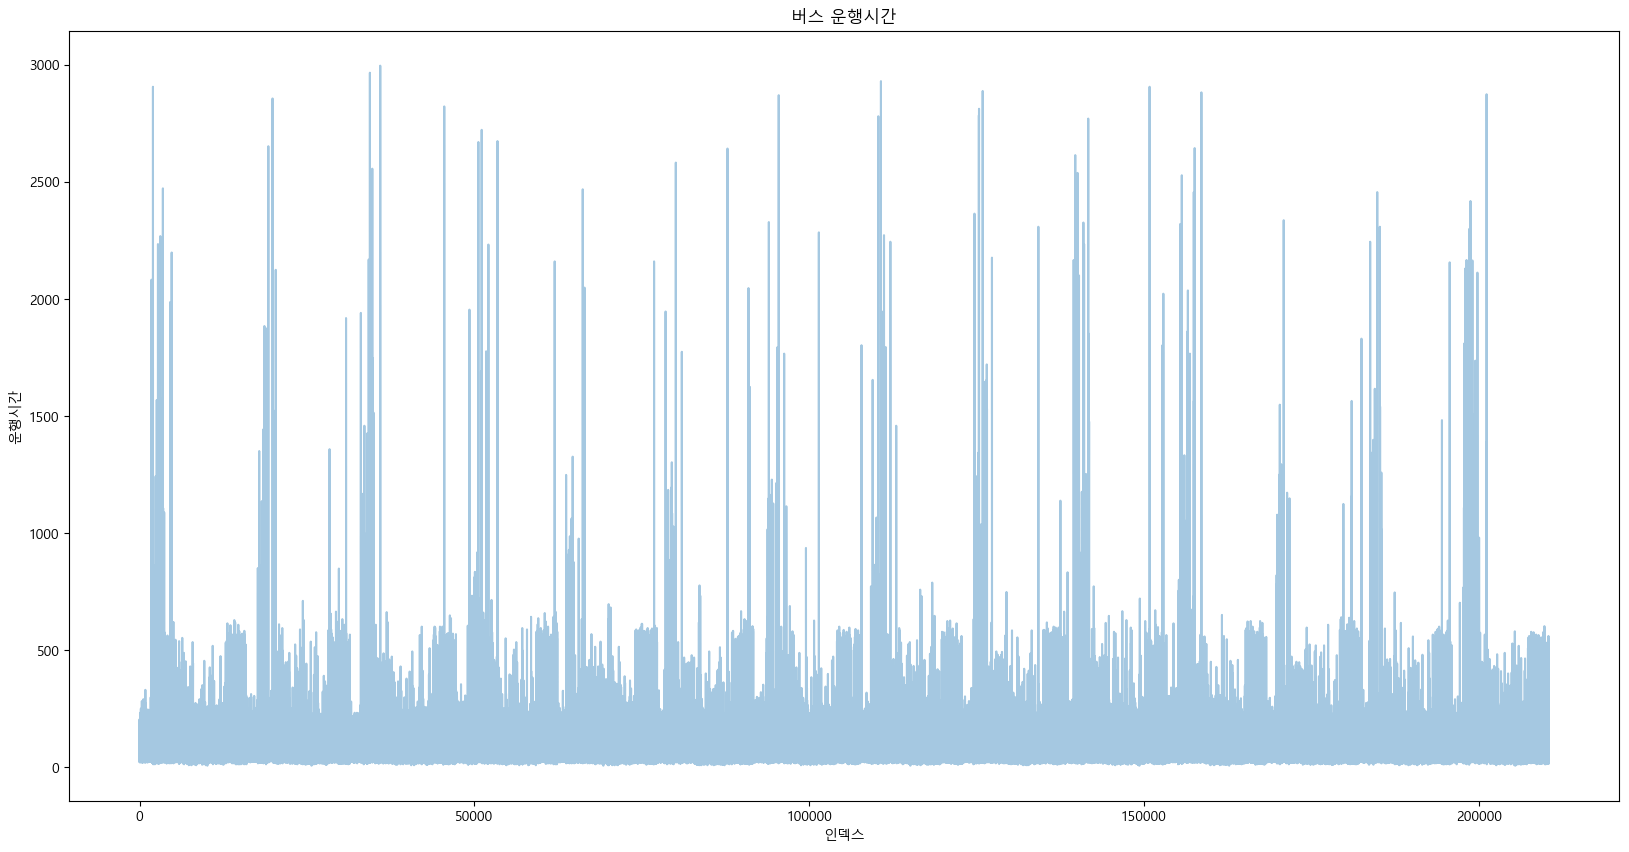

In [35]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
## 코드 작성   
ax = train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)

ax.set_title('버스 운행시간')
ax.set_xlabel('인덱스')
ax.set_ylabel('운행시간')

plt.show()

그래프를 통해 다음와 같은 특징을 확인할 수 있다.

* 가장 많은 운행 시간 구간은 250 미만.
* 두 번째로 많은 운행 시간 구간은 250 이상 600 미만
* 운행 시간 구간이 600이상 2300 미만 사이도 존재

### 3. 운행 시간 분포 시각화 실습

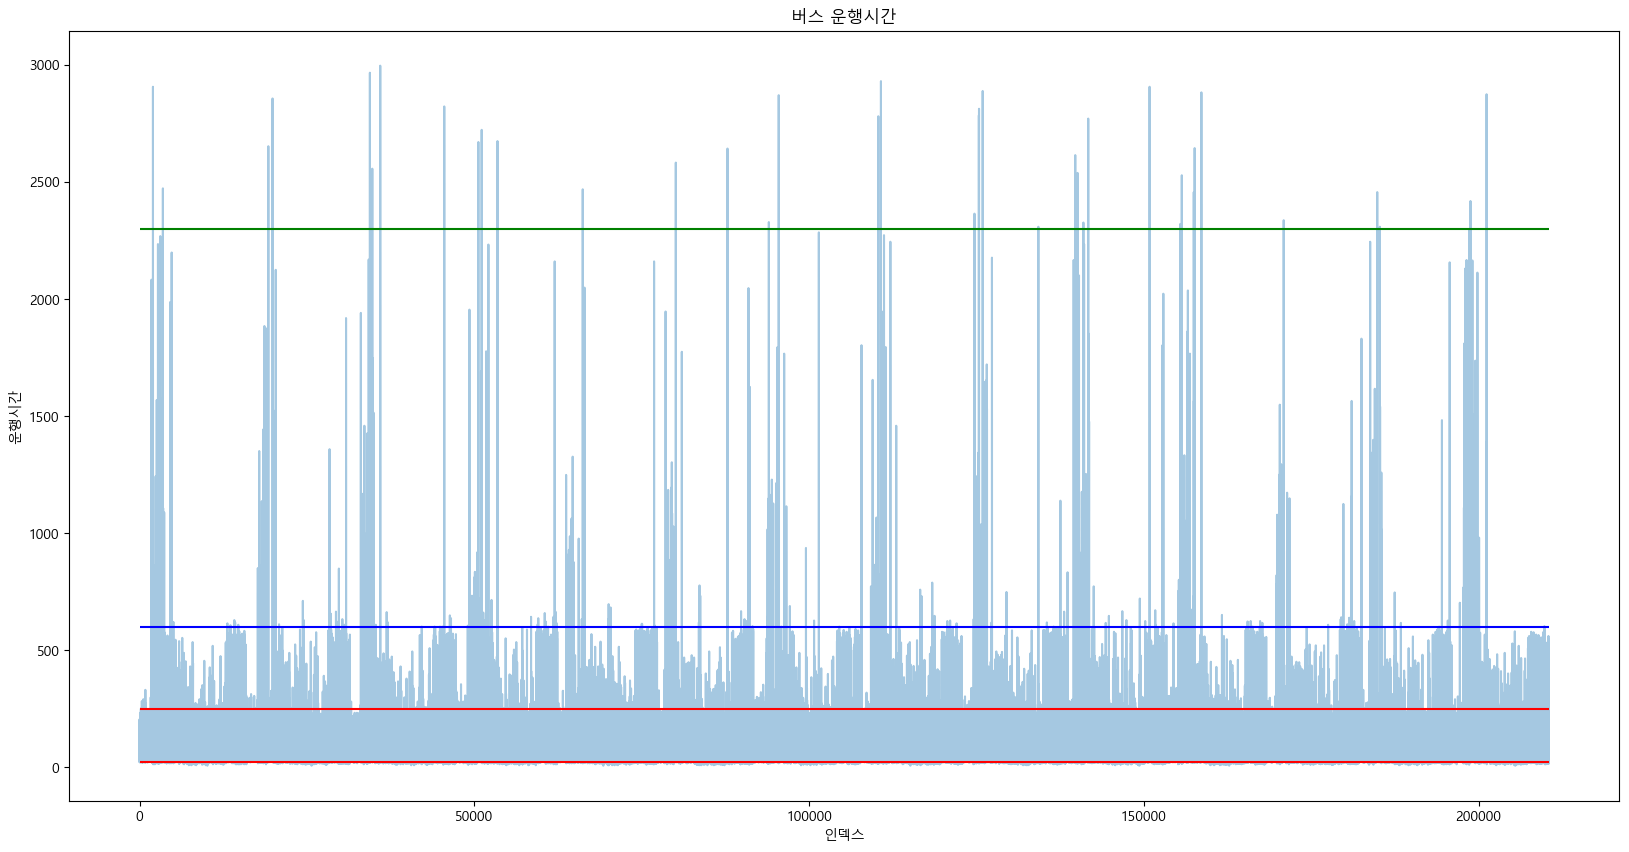

In [37]:
ax = train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)    

ax.set_title('버스 운행시간')    
ax.set_xlabel('인덱스')    
ax.set_ylabel('운행시간')    

ax.hlines(y = 20, xmin=0, xmax=len(train), colors='red')    
ax.hlines(y = 250, xmin=0, xmax=len(train), colors='red')    
ax.hlines(y = 600, xmin=0, xmax=len(train), colors='blue')    
ax.hlines(y = 2300, xmin=0, xmax=len(train), colors='green')    

plt.show()    

### 4. 버스 운행 시간 구간별 데이터셋 생성

In [38]:
a = train[train['next_arrive_time']<20]
b = train[(train['next_arrive_time']>=20) & (train['next_arrive_time']<250)]
c = train[(train['next_arrive_time']>=250) & (train['next_arrive_time']<600)]
d = train[(train['next_arrive_time']>=600) & (train['next_arrive_time']<2300)]
e = train[(train['next_arrive_time']>=2300)]

### 5. 버스 운행 시간 구간별 횟수 시각화

운행시간이 20 이상 250 미만인 b 데이터의 개수가 가장 많다.

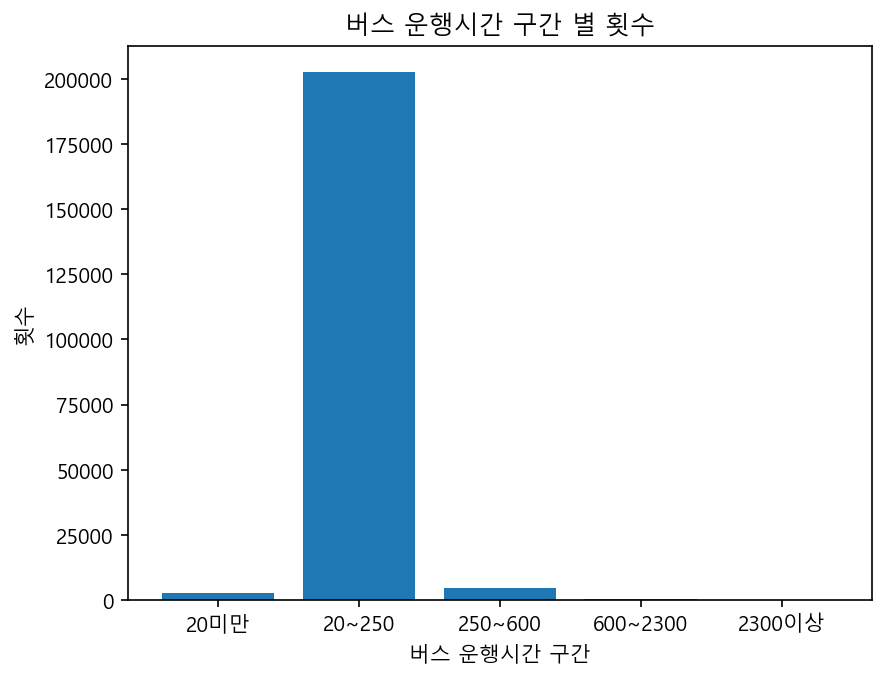

In [39]:
x = ['20미만', '20~250', '250~600', '600~2300', '2300이상']
y = [len(a),len(b),len(c),len(d),len(e)]

# fig와 ax 객체 생성
fig, ax = plt.subplots(dpi=150)

ax.bar(x,y)

ax.set_title('버스 운행시간 구간 별 횟수')
ax.set_xlabel('버스 운행시간 구간')
ax.set_ylabel('횟수')

plt.show()

### 6. 버스 운행 시간 b구간이 차지하는 비율 확인

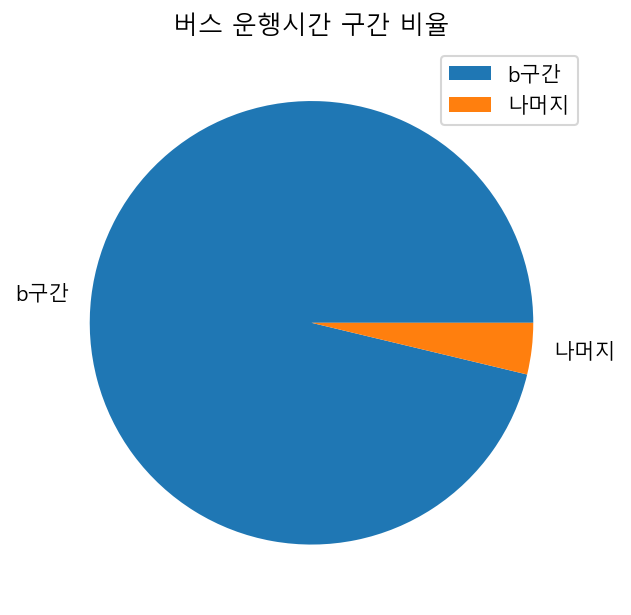

In [40]:
label = ['b구간', '나머지']
value = [len(b)/len(train), (1-len(b)/len(train))]

plt.figure(dpi=150)

plt.title('버스 운행시간 구간 비율')

plt.pie(x = value, labels = label)
plt.legend()
plt.show()

### 7. 버스 운행 시간 분포 확인

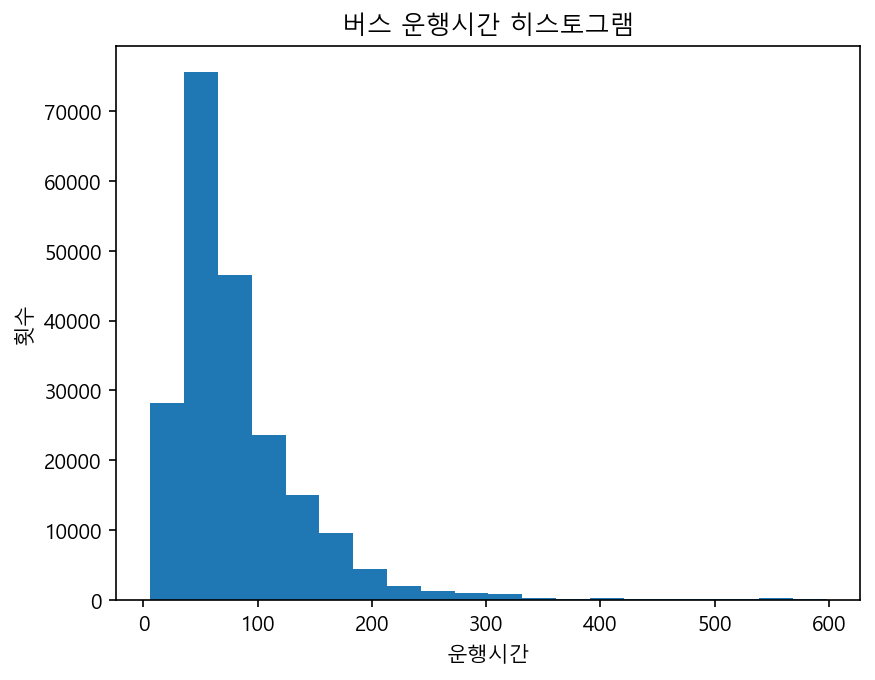

In [43]:
fig, ax = plt.subplots(dpi=150)

ax.hist(train[train['next_arrive_time']<600]['next_arrive_time'], bins=20)

ax.set_title('버스 운행시간 히스토그램')
ax.set_xlabel('운행시간')
ax.set_ylabel('횟수')

plt.show()

### 8. a 데이터셋과 나머지 데이터셋의 거리 평균 확인

그래프 출력 결과 a 그룹의 평균 거리는 약 200 정도이며, 나머지 그룹의 평균 거리는 약 500 정도이다. a그룹과 나머지 그룹을 비교했을 때, 예상했던 대로 운행시간이 짧을수록 운행 거리도 짧은 것으로 판명된다.

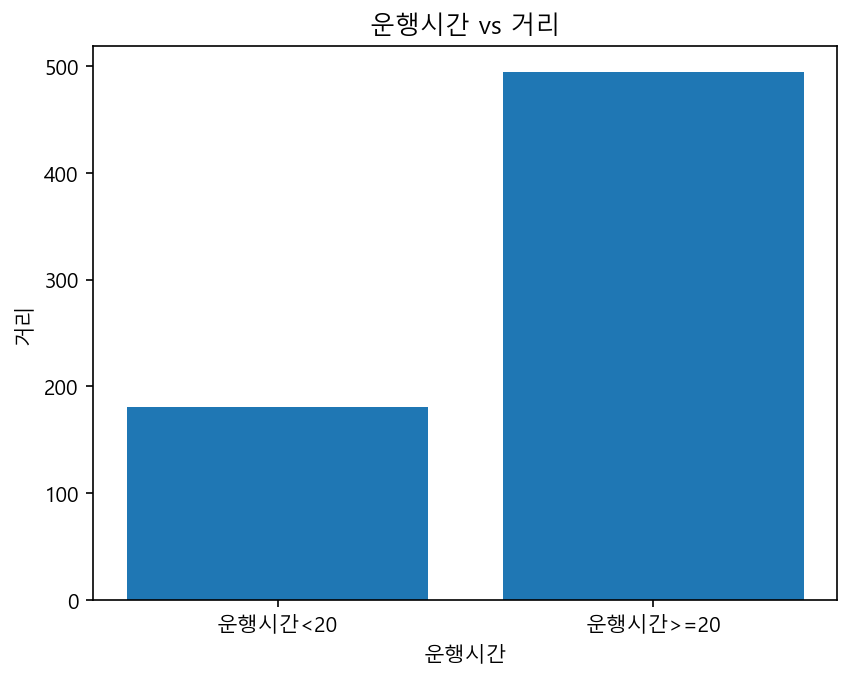

In [44]:
x = ['운행시간<20', '운행시간>=20']
y = [a['distance'].mean(), pd.concat([b,c,d,e])['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

### 9. b 데이터셋과 c 데이터셋 거리 평균 확인

b 데이터셋의 평균은 약 500, c 데이터셋의 평균은 약 2500 정도이다. 운행 시간이 250 이상인 데이터부터 거리가 늘어나는데 이를 통해 운행 시간이 짧으면 거리도 짧을 것이란걸 확인할 수 있다.

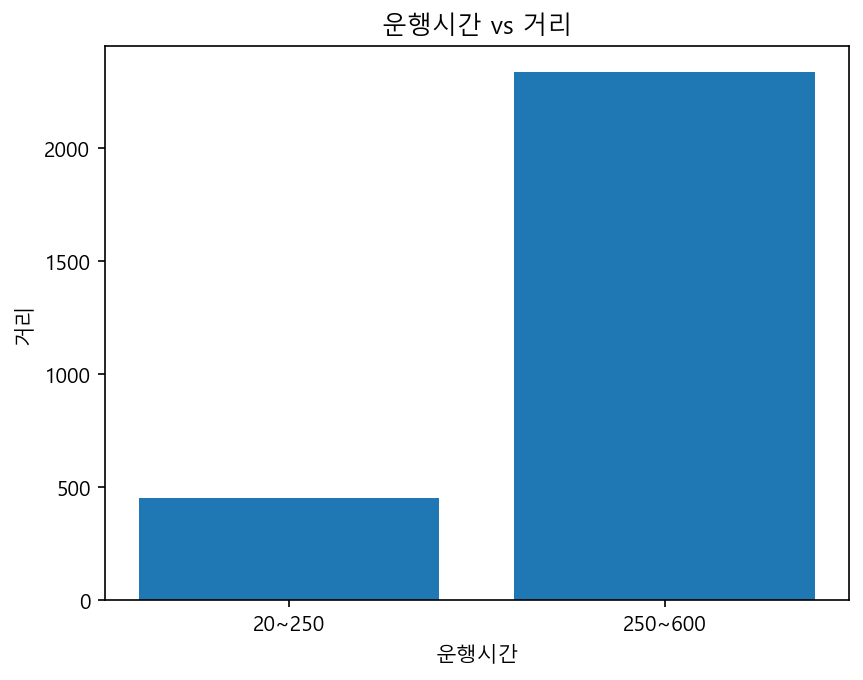

In [45]:
x = ['20~250', '250~600']
y = [b['distance'].mean(), c['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

### 10. 거리 vs 운행 시간 산점도

산점도를 통해 운행 거리와 운행 시간의 관계를 확인한 결과, 대체로 우상향 하는 모양이 나타났다. 

특히, 거리가 1000 초과인 데이터에서는 거리가 증가할 수록 운행 시간도 선형적으로 증가하는 경향을 보였다.
    
하지만 거리가 1000 이하인 구간에서는 운행시간의 분포가 일정하지 않았고, 이상치가 존재하는 것으로 나타났다. 이상치를 그대로 놔둘 경우 모델의 일반화 능력이 하락할 수 있으므로, 이상치 제거를 고려할 수 있다.

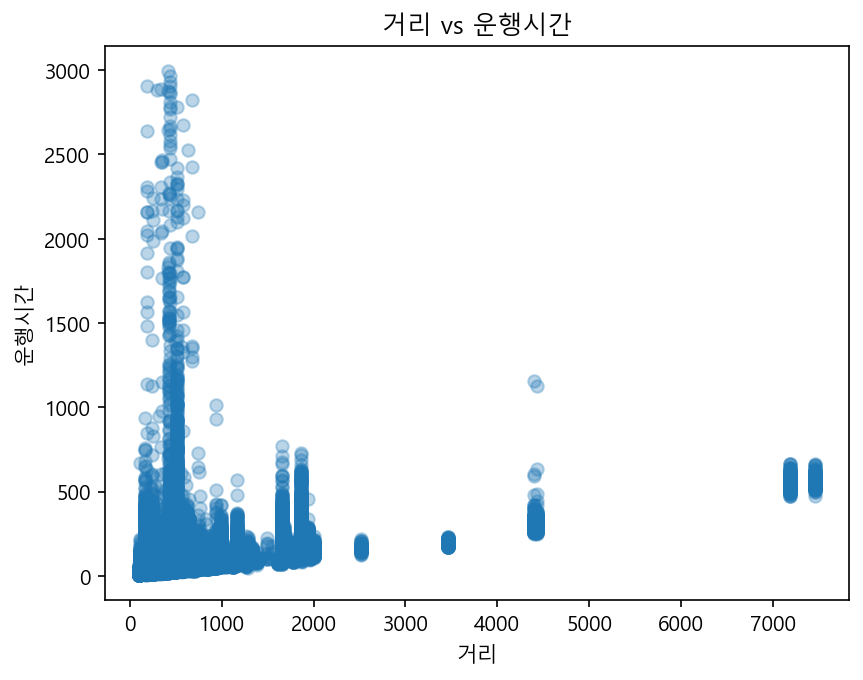

In [46]:
x = train['distance']
y = train['next_arrive_time']

plt.figure(dpi = 150)

plt.title('거리 vs 운행시간')
plt.xlabel('거리')
plt.ylabel('운행시간')

plt.scatter(x,y, alpha = 0.3)

plt.show()

### 11. 운행 시간 이상치 시각화

운행거리가 1000이하이면서 운행 시간이 1000이상일 때 운행 거리에 비례하여 운행 시간이 증가하지 않는 것을 확인했다. 따라서 직사각형으로 이 구간을 표시함으로써 해당 구간이 이상치인지 조금 더 명확하게 확인이 가능할 것이다.

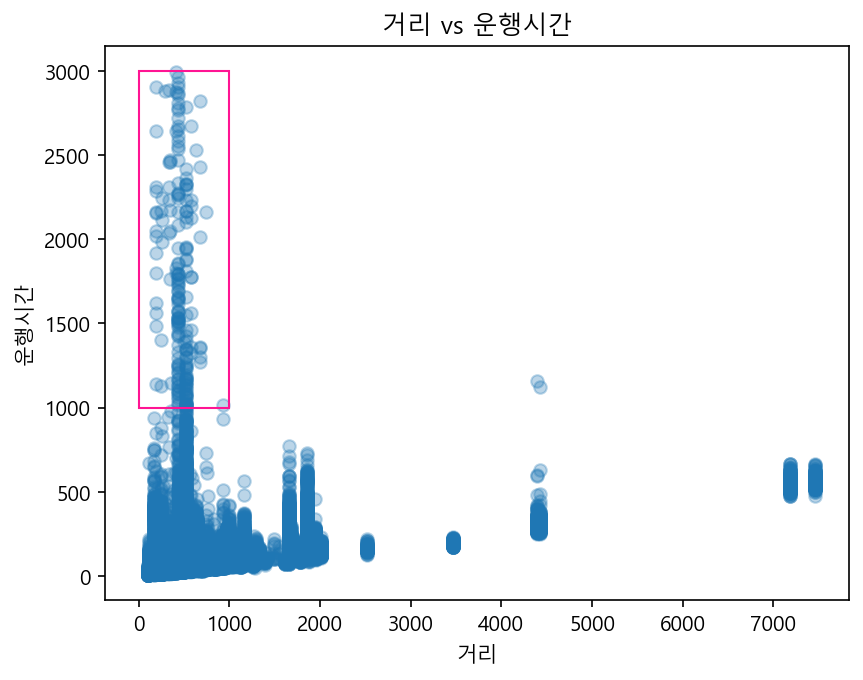

In [47]:
import matplotlib.patches as patches

x = train['distance']
y = train['next_arrive_time']

plt.figure(dpi = 150)

plt.title('거리 vs 운행시간')
plt.xlabel('거리')
plt.ylabel('운행시간')

plt.scatter(x,y, alpha = 0.3)

# 이상치 표시하기 - 직사각형
plt.gca().add_patch(
    patches.Rectangle(
        (0, 1000),
        1000, 2000,               
        edgecolor = 'deeppink',
        fill=False,
    ))

plt.show()

### 12. 포리움(folium) 라이브러리를 활용한 이상치 시각화

운행 거리 distance 가 1000이하이면서 운행 시간 next_arrive_time이 1000 이상인 데이터를 locations 변수에 저장하고,
포리움 라이브러리의 Map() 함수를 활용해서 이상치를 시각화해보자.

이상치에 해당하는 데이터는 제주대학교를 포함하여 도심에 주로 분포하는 것을 확인할 수 있다.

In [48]:
import folium

# 운행 거리가 1000 이하이면서 운행 시간이 1000 이상인 데이터의 좌표 정보 (list)
locations = train[(train['distance'] <= 1000) & (train['next_arrive_time'] >= 1000)][['next_latitude', 'next_longitude']].values.tolist()

# 지도 중심 좌표 - 위도와 경도의 평균
lat_mean = sum([lat[0] for lat in locations]) / len(locations)
long_mean = sum([long[1] for long in locations]) / len(locations)
center = [lat_mean, long_mean]

# 지도 그리기  
m = folium.Map(location=center, zoom_start=9, tiles='cartodbpositron')

# 점(Circle) 표시하기
for location in locations:
    folium.Circle(
        radius=300,
        location=location,
        fill=True
    ).add_to(m)

m

### 13. 이상치가 아닌 데이터 시각화

이상치가 아닌 데이터를 확인했을 때 거리가 증가할 수록 운행 시간도 증가하는 비례관계를 확인할 수 있다. 이상치를 배제한다면 거리가 증가할 때 운행시간이 증가하는 선형 관계를 반영시킬 수 있다.

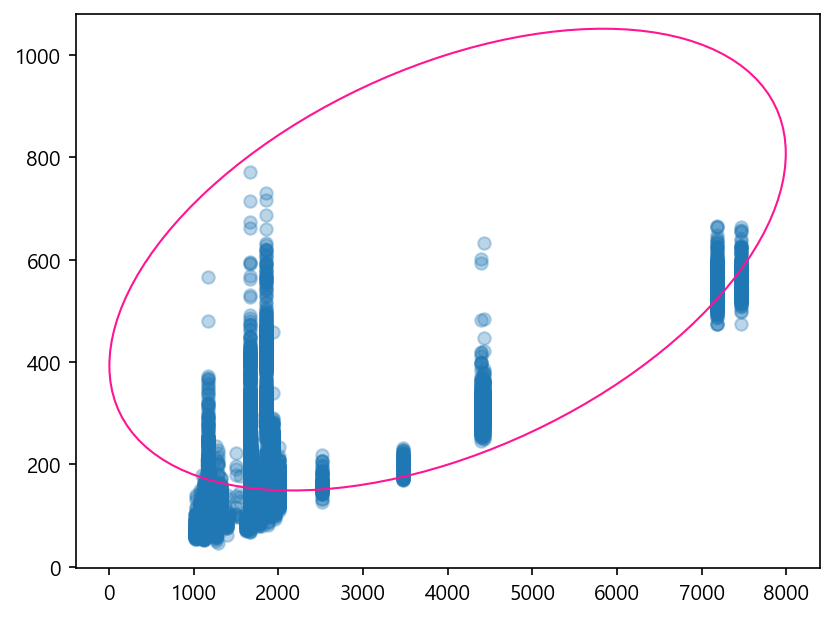

In [49]:
temp = train[(train['distance'] > 1000) & (train['next_arrive_time'] < 1000)]

x = temp['distance']
y = temp['next_arrive_time']

plt.figure(dpi = 150)
plt.scatter(x,y, alpha = 0.3)

# 운행시간 분포 표시하기 - 타원
plt.gca().add_patch(
   patches.Ellipse(
      (4000, 600),
      8000, 800,               
      edgecolor = 'deeppink',
      fill=False,
      angle=3
   ))

plt.show()

### 14. 운행 시간이 2300 이상인 데이터 시각화

운행 시간이 가장 긴 데이터는 다른 지역에 비해 제주대학교에 주로 분포한다.

In [50]:
# 운행 시간이 2300 이상인 데이터의 좌표 정보 (list)
locations = train[train['next_arrive_time'] >= 2300][['next_latitude', 'next_longitude']].values.tolist()

# 지도 중심 좌표 - 위도와 경도의 평균
lat = sum([lat[0] for lat in locations]) / len(locations)
long = sum([long[1] for long in locations]) / len(locations)
center = [lat, long]

# 지도 그리기
m = folium.Map(location=center, zoom_start=12)

# 점(Circle) 표시하기
for location in locations:
    folium.Circle(
        radius=300,
        location=location,
        fill=True
    ).add_to(m)

m

### 15. 제주대학교 데이터 확인


제주대학교의 맨 아래 좌표(next_latitude, next_longitude)가 다른 것을 발견할 수 있다. 운행 시간이 긴 데이터는 좌표가 다른 것을 확인했다. 

이를 이용해서 운행 시간을 예측할 수 있을 것이다.

In [51]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] >= 2300)]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
2003,2003,2019-10-15,405136002,7997082,360-2,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2906
3487,3487,2019-10-15,405136521,7997070,365-21,33.458900,126.557300,제대아파트,16시,435.0,제주대학교,33.460114,126.561659,2472
19236,19236,2019-10-16,405136521,7997001,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2652
19864,19864,2019-10-16,405136521,7997087,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2856
34763,34763,2019-10-17,405136521,7997070,365-21,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2556
50606,50606,2019-10-18,405136521,7997001,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2670
51100,51100,2019-10-18,405136521,7997087,365-21,33.458900,126.557300,제대아파트,13시,435.0,제주대학교,33.460114,126.561659,2722
80094,80094,2019-10-20,405136521,7997001,365-21,33.458900,126.557300,제대아파트,21시,435.0,제주대학교,33.460114,126.561659,2582
95465,95465,2019-10-21,405136521,7997089,365-21,33.458900,126.557300,제대아파트,16시,435.0,제주대학교,33.460114,126.561659,2870
110341,110341,2019-10-22,405136012,7997033,360-12,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2780


### 16. 좌표로 운행 시간을 예측할 수 있는지 확인


좌표만으로 운행시간을 예측할 수 있는지 확인하기 위해 제주대학교의 경도인 216.561659로 설정하였다. 만약 예측 가능한다면, 선 그래프를 그렸을 때 운행 시간의 값이 일정할 것이다.

하지만 동일 좌표임에도 운행 시간이 불규칙한 것을 확인할 수 있다. 이를 통해 운행시간이 긴 데이터는 좌표로 예측이 불가능하다.

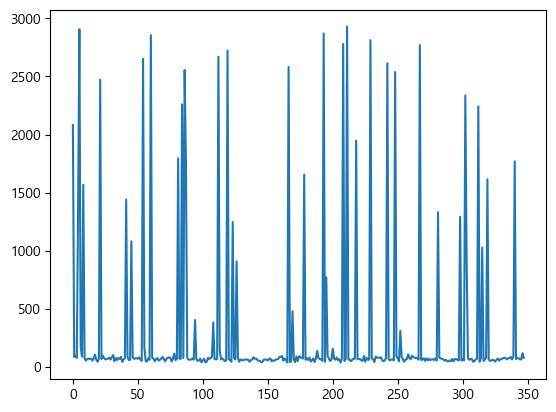

In [52]:
# 운행 시간이 긴 데이터
X = train[train['next_longitude'] == 126.561659]['next_arrive_time'].reset_index(drop=True).index
Y = train[train['next_longitude'] == 126.561659]['next_arrive_time'].reset_index(drop=True).values

plt.plot(X,Y)
plt.show()

### 17. 문자열 값 변환 준비

In [53]:
my_list = list(train['route_nm'].unique()) + list(train['now_station'].unique()) + list(train['next_station'].unique())
my_dict = {text : i for i, text in enumerate(my_list)}
my_dict

{'360-1': 0,
 '360-2': 1,
 '360-7': 2,
 '360-12': 3,
 '365-21': 4,
 '365-22': 5,
 '201-11': 6,
 '201-12': 7,
 '201-13': 8,
 '201-14': 9,
 '201-15': 10,
 '201-16': 11,
 '201-17': 12,
 '201-18': 13,
 '201-21': 14,
 '201-22': 15,
 '201-24': 16,
 '201-26': 17,
 '201-27': 18,
 '281-1': 19,
 '281-2': 20,
 '제주대학교입구': 400,
 '제대마을': 369,
 '제대아파트': 370,
 '남국원(아라방면)': 403,
 '도호동': 382,
 '한라중학교/부영아파트': 408,
 '대림2차아파트': 374,
 '롯데마트': 402,
 '원노형': 376,
 '노형오거리': 377,
 '남녕고등학교': 378,
 '한라병원': 379,
 '삼무공원사거리': 380,
 '제원아파트': 381,
 '은남동': 373,
 '연동주민센터': 383,
 '제주도청 신제주로터리': 384,
 '월구마을': 406,
 '동성마을': 386,
 '제주버스터미널': 387,
 '한국병원': 388,
 '남서광마을입구': 389,
 '남서광마을': 390,
 '탐라장애인 종합복지관': 391,
 '제주시청(아라방면)': 392,
 '고산동산(아라방면)': 393,
 '제주지방법원(아라방면)': 394,
 '아라초등학교': 396,
 '아라주공아파트': 397,
 '인다마을': 398,
 '남국사': 407,
 '연동대림1차아파트': 375,
 '케이티앤지': 401,
 '제주중앙여자고등학교(아라방면)': 395,
 '제주여자중고등학교(아라방면)': 372,
 '제주대학교병원': 399,
 '연동입구': 385,
 '오라3동': 405,
 '죽성마을 입구': 404,
 '제주대학교': 371,
 '부영아파트': 429,
 '제주시청(광양방면)': 414,

### 18. 문자열 및 시간 데이터 값 변환

In [56]:
train[['route_nm', 'now_station', 'next_station']] = train[['route_nm', 'now_station', 'next_station']].applymap(lambda x : my_dict[x])
test[['route_nm', 'now_station', 'next_station']] = test[['route_nm', 'now_station', 'next_station']].applymap(lambda x : my_dict[x])

def text_to_time(text:str):
    return int(text[:2])

train['now_arrive_time'] = train['now_arrive_time'].map(text_to_time)
test['now_arrive_time'] = test['now_arrive_time'].map(text_to_time)

train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,0,33.456267,126.551750,400,6,266.0,369,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,0,33.457724,126.554014,369,6,333.0,370,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,0,33.458783,126.557353,370,6,415.0,371,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,0,33.479705,126.543811,403,6,578.0,372,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,0,33.485662,126.494923,382,7,374.0,373,33.485822,126.490897,64


### 19. 이상치 제거 실습

앞서 EDA를 통해 운행 시간이 1000이상인 데이터는 이상치라고 판단하였기에, 운행 시간이 1000 미만인 데이터만을 train 변수에 저장한다.

In [57]:
train = train[train['next_arrive_time'] < 1000]

### 20. 독립변수, 종속변수 설정

train 데이터프레임에는 id, date, route_id, vh_id, route_nm, now_latitude, now_longitude,
now_station, now_arrive_time, distance, next_station, next_latitude, next_longitude,
next_arrive_time 의 순서로 칼럼(column)이 존재한다.

In [58]:
features = train.columns[2:-1]     
target = train.columns[-1]    

X = train[features]     
y = train[target]

### 21. 학습/ 검증 데이터 분리

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, shuffle=False)

#데이터 shape 확인
print(f"X_train.shape : {X_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"X_valid.shape : {X_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

X_train.shape : (147179, 11)
y_train.shape : (147179,)
X_valid.shape : (63077, 11)
y_valid.shape : (63077,)


### 22. 랜덤 포레스트 모델 정의, 학습 및 예측


In [60]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 20)

model.fit(X_train,y_train)

# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test[features])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[ 34.41166667  44.11       132.72        58.76666667 175.08690476
  26.33214286  80.88333333 196.05452381 126.49444444 106.67587302]


### 23. 제출 파일 생성 및 제출 및 CSV 파일 생성

In [61]:
submission['next_arrive_time'] = predict     
submission.head()

,id,next_arrive_time
0,210457,34.411667
1,210458,44.110000
2,210459,132.720000
3,210460,58.766667
4,210461,175.086905


In [62]:
submission.to_csv('data/bus/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 5

### 1. 데이터 읽어오기

In [1]:
import pandas as pd

train = pd.read_csv('data/bus/train.csv')
test = pd.read_csv('data/bus/test.csv')   
submission = pd.read_csv('data/bus/sample_submission.csv')  

### 2. route_id와 route_nm 칼럼의 식별가능여부 확인

아래 코드를 실행한 결과, 360-1이라는 고유한 값이 route_nm 컬럼에서 출력되었고 405136001이라는 고유한 값이 route_id 컬럼에서 출력되었다.

즉 route_nm 컬럼과 route_id 컬럼은 서로 1:1로 대응되는 컬럼이르모, 둘 중 하나의 컬럼은 사용하지 않고 제거할 수 있다.

In [2]:
id = 405136001 
number = '360-1'

select_nm = train[train['route_id'] == id]['route_nm'].unique()
select_id = train[train['route_nm'] == number]['route_id'].unique()

print(select_nm)
print(select_id)

['360-1']
[405136001]


### 3. vh_id 칼럼의 식별 가능여부 확인(1)

1:1 대응 관계였던 route_id, route_nm과 달리 vh_id 컬럼은 1:n, 일대다 관계이다. vh_id 컬럼을 사용하여 route_id, route_nm 컬럼을 살펴봄으로써 vh_id 컬럼이 식별 가능한 컬럼인지 확인할 수 있다.

In [3]:
print(train[train['route_id'] == 405136001]['vh_id'].unique())
print(train[train['route_nm'] == '360-1']['vh_id'].unique())

[7997025 7997034 7997035 7997040 7997044 7997058 7997064 7997080 7997118
 7997124]
[7997025 7997034 7997035 7997040 7997044 7997058 7997064 7997080 7997118
 7997124]


### 4. vh_id 칼럼의 식별 가능여부 확인(2)

In [4]:
print(train[train['vh_id'] == 7997025]['route_id'].unique())
print(train[train['vh_id'] == 7997025]['route_nm'].unique())

[405136001]
['360-1']


### 5. 고유값 추출

vh_id에 대해 route_id와 route_nm의 고유한 값들이 각각 하나인지 확인하는 함수이다. 만약 둘 중 하나라도 여러 개의 고유한 값이 있는 경우 True를 반환하고, 아니면 False를 반환한다.

코드 실행 결과 False가 출력되었다. 이는 모든 vh_id가 고유한 route_id와 route_nm을 가지고 있다는 것을 의미한다.

In [5]:
def check_unique(text:str):
    if (len(train[train['vh_id'] == text]['route_id'].unique()) != 1) |    \
        (len(train[train['vh_id'] == text]['route_nm'].unique()) != 1):
        return True
    else :
        return False

check_vhid = list(map(check_unique, train['vh_id'].unique()))
set(check_vhid)

{False}

### 6. vh_id 가 바뀌는 인덱스 살펴보기

train 데이터 셋의 인덱스가 178~183 행을 출력해보자.

In [6]:
train.loc[178:183][['vh_id']]

,vh_id
178,7997025
179,7997025
180,7997025
181,7997034
182,7997034
183,7997034


### 7. shift() 메서드 사용해보기


코드를 실행했을 때 인덱스 180에서 vh_id와 shifted_vhid가 다른 것을 확인할 수 있다.

In [7]:
train['shifted_vhid'] = train['vh_id'].shift(-1)
train.loc[178:183][['vh_id', 'shifted_vhid']]

,vh_id,shifted_vhid
178,7997025,7997025.0
179,7997025,7997025.0
180,7997025,7997034.0
181,7997034,7997034.0
182,7997034,7997034.0
183,7997034,7997034.0


### 8. vh_id 와 shifted_vhid 의 값이 다른 id 저장


첫 번째 행의 id는 비교할 값이 없어서 변하지 않기 때문에 idx 리스트의 초기값으로 -1을 할당

In [8]:
idx = [-1]     
idx = idx + list(train[train['vh_id'] != train['shifted_vhid']]['id'].values)
idx[:10]

[-1, 180, 380, 538, 716, 901, 1086, 1265, 1421, 1591]

### 9. vh_id 별 경로 시각화


In [9]:
import folium

# 0~1329 사이의 값을 입력하여 경로를 확인해보세요!
my_idx = 700

long = train['now_longitude'].mean()
lat = train['now_latitude'].mean()
center = [lat,long]

m = folium.Map(location=center, zoom_start=10)

# my_idx가 700일 경우 train.loc[114015:114139][['next_latitude', 'next_longitude']].values와 동일
locations = train.loc[idx[my_idx]+1:idx[my_idx+1]][['next_latitude', 'next_longitude']].values

folium.PolyLine(locations=locations).add_to(m)

m

### 10. 역 이름과 좌표


역마다 고유한 좌표가 몇 개 존재하는지 확인해보자.

실행 결과, 역 이름은 같지만 현재 위도의 값이 다른 곳이 일부 존재한다.

In [14]:
pd.DataFrame(train.groupby(['now_station', 'now_latitude']).count().reset_index()[:50].value_counts('now_station'))

,count
now_station,
911의원,2
고성리제주은행,2
구좌중앙초등학교,2
구좌보건지소,2
교래입구,2
광치기해변,2
광지동,2
광대왓,2
관덕정,2


### 11. now_latitude 칼럼의 역 이름 식별 가능여부 확인


하나의 now_latitude에 대해 now_station의 고유값이 1개가 아니라면 True, 1개만 존재한다면 False를 반환한다.

실행 결과 False와 True 모두 반환되었기에, now_latitude는 식별 가능한 컬럼이 아니라는 것을 의미한다.

In [15]:
def check_station(text:str):
    if len(train[train['now_latitude'] == text]['now_station'].unique()) != 1:
        return True
    else :
        return False

check_nowlat = list(map(check_station, train['now_latitude'].unique()))
set(check_nowlat)

{False, True}

### 12. now_longitude의 식별 가능 여부 확인


위와 똑같이 now_longitude에 대해서도 똑같이 적용시켰는데 False가 반환되었다. 

즉, now_longutude는 역 이름과 1:1로 대응되며 식별 가능한 컬럼이라는 것을 의미한다.

In [26]:
def check_station(text:str):
    if len(train[train['now_longitude'] == text]['now_station'].unique()) != 1:
        return True
    else :
        return False

check_nowlong = list(map(check_station, train['now_longitude'].unique()))
set(check_nowlong)

{False}

### 13. next_longitude의 식별 가능 여부 확인


실행 결과 False가 반환되었다.

결론적으로 좌표 데이터 중 now_longitude, next_longitude 컬럼만 식별 가능함을 확인하였다.
따라서 각 longitude 컬럼을 알면 역 이름을 알 수 있다.

In [27]:
def check_station(text:str):
    if len(train[train['next_longitude'] == text]['next_station'].unique()) != 1:
        return True
    else :
        return False

check_next_long = list(map(check_station, train['next_longitude'].unique()))
set(check_next_long)

{False}

### 14. 역 이름은 같지만 좌표가 다른 경우, 좌표별로 운행 시간에 차이가 날까?


같은 역에 대한 좌표별 운행 시간의 차이가 있는지 확인하기 위해 911의원 역을 살펴보자.

실행 결과 911의원 1번 정류장의 평균 운행 시간 값은 약 60, 2번 정류장의 평균 운행 시간 값은 약 85이다. 현재 위도가 다를 수록 운행 시간의 차이가 존재한다.

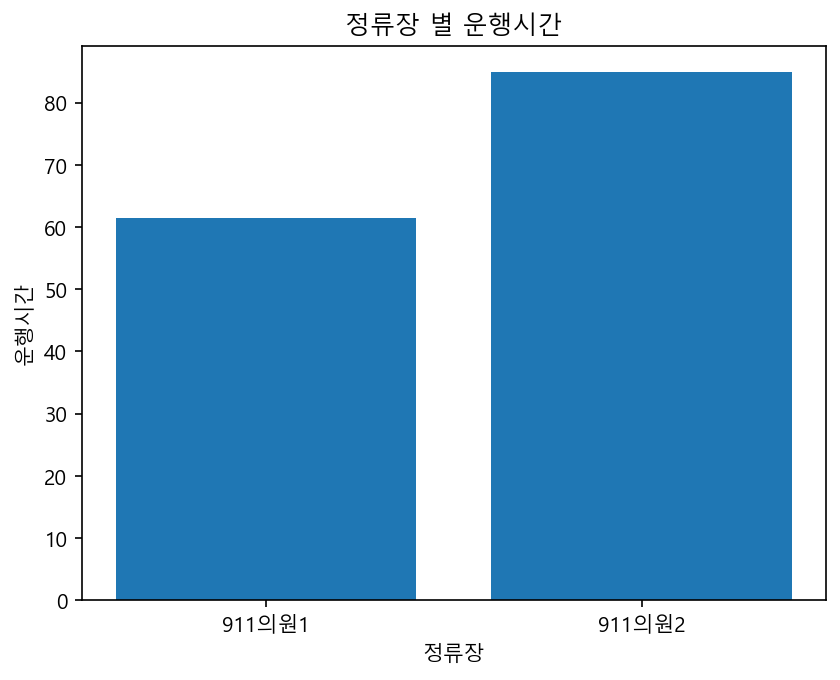

In [29]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

## 코드 작성
x = ['911의원1', '911의원2']
y = [train[train['now_latitude'] == train[train['now_station'] == '911의원']['now_latitude'].unique()[0]]['next_arrive_time'].mean(),
     train[train['now_latitude'] == train[train['now_station'] == '911의원']['now_latitude'].unique()[1]]['next_arrive_time'].mean()]

plt.rc('font', family='Malgun Gothic')
plt.figure(dpi=150)

plt.title('정류장 별 운행시간')
plt.xlabel('정류장')
plt.ylabel('운행시간')

plt.bar(x,y)
plt.show()

### 15. 고성리제주은행 시각화


이번에는 고성리제주은행 역을 살펴보자.

실행 결과 911의원, 고성리제주은행 모두 좌표별 운행 시간에 차이가 난다. 

즉, 같은 역 이름을 가지더라도 좌표가 다르면 운행 시간에 차이가 있다는 것을 알 수 있다.

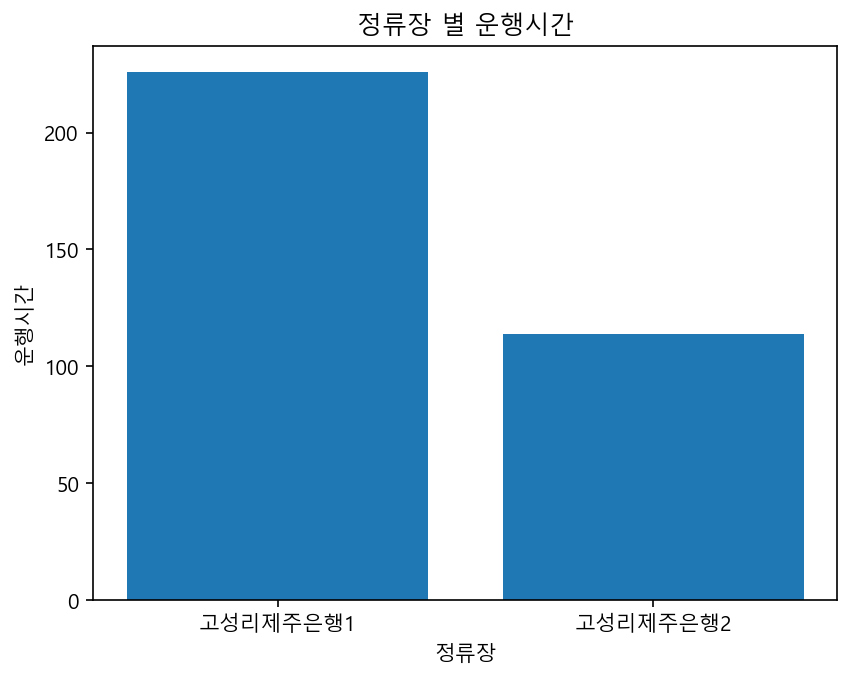

In [35]:
x = ['고성리제주은행1', '고성리제주은행2']
y = [train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[0]]['next_arrive_time'].mean(),
     train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[1]]['next_arrive_time'].mean()]

plt.figure(dpi=150)

plt.title('정류장 별 운행시간')
plt.xlabel('정류장')
plt.ylabel('운행시간')

plt.bar(x,y)
plt.show()

### 16. 시간대별 데이터 수 확인


코드 실행 결과 00시, 05시, 06시, 22시, 23시의 등장 빈도가 다른 값에 비해 적다.

In [36]:
train['now_arrive_time'].value_counts().sort_index()

now_arrive_time
00시        5
05시      487
06시     8409
07시    13581
08시    13838
09시    13700
10시    13011
11시    12524
12시    13433
13시    13197
14시    12592
15시    12846
16시    13476
17시    13090
18시    12987
19시    13275
20시    11852
21시    11230
22시     6470
23시      454
Name: count, dtype: int64

### 17. train 데이터의 시간대별 데이터 수 시각화


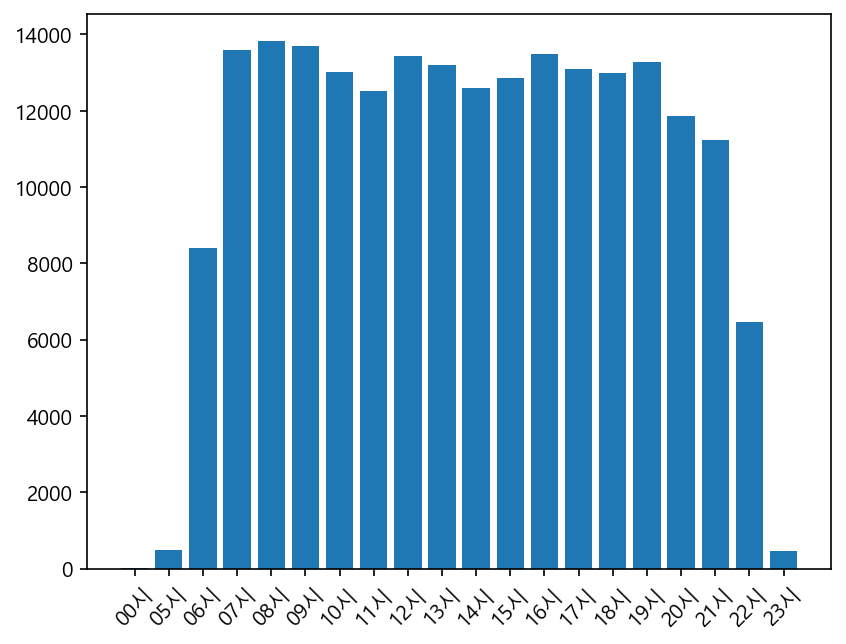

In [37]:
x = train['now_arrive_time'].value_counts().sort_index().index
y = train['now_arrive_time'].value_counts().sort_index().values

# fig와 ax 객체 생성
fig, ax = plt.subplots(dpi=150)

ax.bar(x, y)

# x축의 라벨값을 45도로 기울임
plt.xticks(rotation=45)

plt.show()

### 18. 선 그래프(plot)로 거리 데이터 시각화


거리를 시각화한 결과, 거리가 매우 긴 경로가 존재한다.

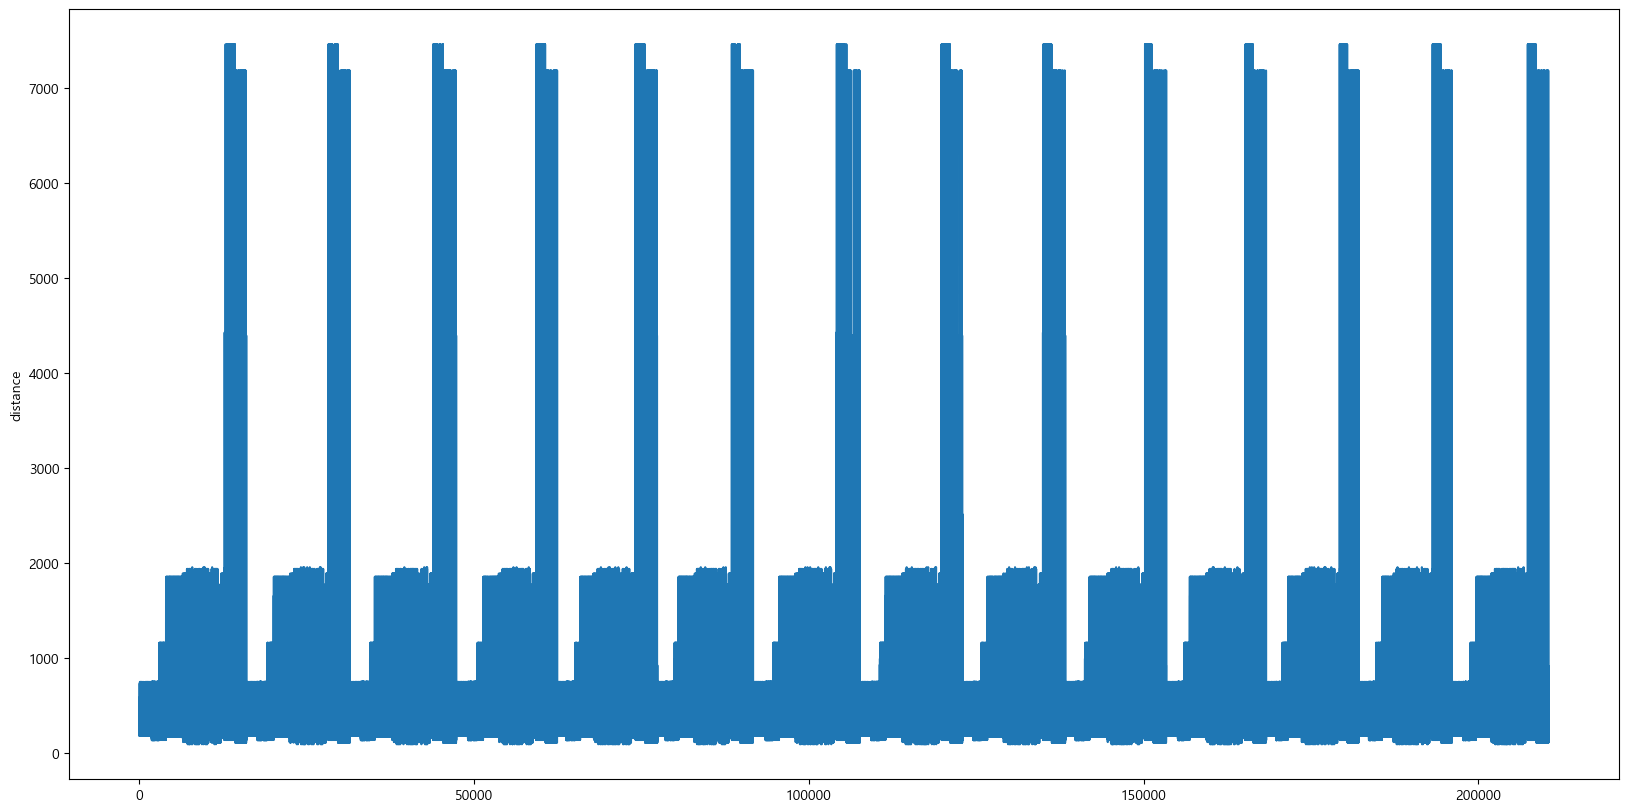

In [38]:
ax = train['distance'].plot(figsize=(20,10))
plt.ylabel('distance')
plt.show()

### 19. 거리가 매우 긴 노선의 버스 ID 정보


In [39]:
train[train['distance'] > 6000]['vh_id'].unique()

array([7983416, 7983417, 7983420, 7983431, 7983441, 7983481, 7983482,
       7983484, 7983400, 7983406, 7983409, 7983414, 7983415, 7983430,
       7983432, 7983439, 7983444, 7983445, 7983485, 7983486, 7983402,
       7983483, 7983412, 7983401], dtype=int64)

### 20. 거리가 6000초과인 버스 운행 경로 시각화

운행 거리가 6000을 초과하는 버스 ID들은 공통적으로 제주시와 서귀포시를 왕복하는 경로를 가지고 있다.

In [42]:
bus_id = 7983416
date = '2019-10-16'

locations = train[(train['vh_id'] == bus_id) & (train['date'] == date)][['now_latitude', 'now_longitude']].values
lat = locations[:, 0].mean()
long = locations[:, 1].mean()
center = [lat, long]

m = folium.Map(location=center, zoom_start=10)

folium.PolyLine(locations=locations).add_to(m)

m

### 21. 데이터 다시 읽어오기

In [43]:
import pandas as pd

train = pd.read_csv('data/bus/train.csv')
test = pd.read_csv('data/bus/test.csv')   
submission = pd.read_csv('data/bus/sample_submission.csv')  

### 22. 문자열 및 경도 데이터 값 변환 준비: vh_id, now_longitude, next_longitude


이번 스테이지의 전처리 결과 버스 ID와 경도 관련 칼럼이 식별 가능한 칼럼임을 확인하였다.

따라서 해당 칼럼에 대해서만 전처리를 수행한다.

In [44]:
my_list = list(train['vh_id'].unique()) + list(train['now_longitude'].unique()) + list(train['next_longitude'].unique())   
my_dict = {text : i for i, text in enumerate(my_list)}

### 23. 문자열 및 경도 데이터 값 변환


In [47]:
convert_int = ['vh_id', 'now_longitude', 'next_longitude']

train[convert_int] = train[convert_int].applymap(lambda x : my_dict[x])
test[convert_int] = test[convert_int].applymap(lambda x : my_dict[x])

def text_to_time(text:str):
    return int(text[:2])

train['now_arrive_time'] = train['now_arrive_time'].map(text_to_time)
test['now_arrive_time'] = test['now_arrive_time'].map(text_to_time)

### 24. 이상치 제거


운행 시간이 1000 미만인 데이터만 사용한다.

In [50]:
train = train[train['next_arrive_time'] < 1000]

### 25. 독립변수, 종속변수 설정

In [51]:
features = ['vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude']

# 학습에 사용할 변수 X 할당
X = train[features]

# 예측할 변수 y 할당
y = train['next_arrive_time']

### 26. 랜덤 포레스트 모델 정의, 학습, 예측


In [52]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
model = RandomForestRegressor(n_estimators=20)

# 모델 학습
model.fit(X, y)

# 예측값 획득
# features = ['vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude']
predict = model.predict(test[features])

### 27. 제출 파일 생성 및 제출 및 CSV 파일 생성

In [53]:
submission['next_arrive_time'] = predict
submission.head()

,id,next_arrive_time
0,210457,33.450000
1,210458,41.600000
2,210459,137.003333
3,210460,59.346667
4,210461,175.665238


In [54]:
submission.to_csv('data/bus/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 6

### 1. 데이터 읽어오기

In [68]:
import pandas as pd

train = pd.read_csv('data/bus/train.csv')
test = pd.read_csv('data/bus/test.csv')   
submission = pd.read_csv('data/bus/sample_submission.csv')  

In [69]:
my_list = list(train['vh_id'].unique()) + list(train['now_longitude'].unique()) + list(train['next_longitude'].unique())   
my_dict = {text : i for i, text in enumerate(my_list)}

convert_int = ['vh_id', 'now_longitude', 'next_longitude']

train[convert_int] = train[convert_int].applymap(lambda x : my_dict[x])
test[convert_int] = test[convert_int].applymap(lambda x : my_dict[x])

def text_to_time(text:str):
    return int(text[:2])

train['now_arrive_time'] = train['now_arrive_time'].map(text_to_time)
test['now_arrive_time'] = test['now_arrive_time'].map(text_to_time)

train = train[train['next_arrive_time'] < 1000]

### 2. 데이터 확인

In [71]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,0,360-1,33.456267,702,제주대학교입구,6,266.0,제대마을,33.457724,671,24
1,1,2019-10-15,405136001,0,360-1,33.457724,671,제대마을,6,333.0,제대아파트,33.458783,672,36
2,2,2019-10-15,405136001,0,360-1,33.458783,672,제대아파트,6,415.0,제주대학교,33.459893,673,40
3,3,2019-10-15,405136001,0,360-1,33.479705,705,남국원(아라방면),6,578.0,제주여자중고등학교(아라방면),33.484860,674,42
4,4,2019-10-15,405136001,0,360-1,33.485662,684,도호동,7,374.0,은남동,33.485822,675,64


### 3.데이터프레임 결측치 확인

In [72]:
train.isnull().sum()

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

### 4. 독립변수 및 종속변수 설정

In [73]:
features = ['vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude']

# 학습에 사용할 변수 X 할당
X = train[features]   

# 예측할 변수 y 할당
y = train['next_arrive_time']

### 5. 학습/ 검증 데이터 분할


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, shuffle=False)

### 6. Random Forest : 하이퍼 파라미터 설정


In [75]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=20, criterion='squared_error', random_state=42)

### 7. 모델 학습 및 예측


In [76]:
# 모델 학습
rf_model.fit(X_train, y_train)

# 예측값 획득
predict = rf_model.predict(X_valid)
predict

array([127.25      , 152.15      , 201.98166667, ...,  23.56428571,
        23.6247619 ,  33.28666667])

### 8. 모델 평가


In [77]:
from sklearn.metrics import mean_squared_error

def rmse(real, pred):    
    return mean_squared_error(real, pred)**0.5

RMSE = rmse(y_valid, predict)
RMSE

36.857889579517135

### 9. 랜덤 포레스트 모델 검증 시각화

예측이 부정확한 경우가 종종 보인다. 실제값과 예측값이 차이가 나는 것을 볼 때, 실제값보다 운행 시간을 더 길게 예측한 경우와 더 짧게 예측한 경우 모두 존재한다.

즉 현재 사용하고 있는 모델은 데이터의 복잡성을 충분히 반영하지 못하여 과소예측이 많이 발생하는 것 같다.

이런 경우 더 복잡한 모델을 시도해 볼 수 있는데, XGBoost와 같이 부스팅 알고리즘을 기반으로 한 모델을 사용하여 데이터의 비선형성을 더 잘 반영할 수 있다.

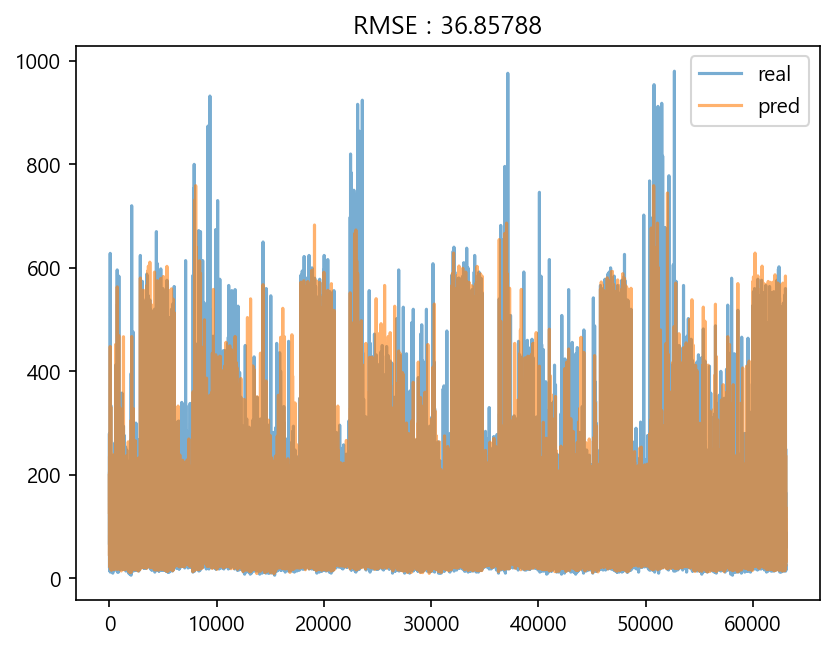

In [79]:
# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

RMSE = rmse(y_valid, predict)

plt.figure(dpi=150)

plt.title('RMSE : ' + str(RMSE)[:8])

plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
plt.plot(predict, alpha=0.6, label='pred')

plt.legend()
plt.show()

### 10. XGBoost 모델 정의


In [80]:
import xgboost

model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators = 3000, eval_metric = 'rmse', early_stopping_rounds=10, random_state=42)

### 11. 모델 학습 / 예측


In [81]:
model.fit(X_train,y_train, eval_set=[(X_valid,y_valid)], verbose=10)

y_pred = model.predict(X_valid)

[0]	validation_0-rmse:54.99631
[10]	validation_0-rmse:37.00261
[20]	validation_0-rmse:35.32440
[30]	validation_0-rmse:34.65770
[40]	validation_0-rmse:33.97588
[50]	validation_0-rmse:33.64609
[60]	validation_0-rmse:33.46740
[70]	validation_0-rmse:33.25797
[80]	validation_0-rmse:33.15821
[90]	validation_0-rmse:33.06828
[100]	validation_0-rmse:33.00256
[110]	validation_0-rmse:32.92503
[120]	validation_0-rmse:32.88462
[130]	validation_0-rmse:32.86510
[140]	validation_0-rmse:32.82980
[150]	validation_0-rmse:32.81173
[160]	validation_0-rmse:32.79511
[170]	validation_0-rmse:32.78296
[180]	validation_0-rmse:32.77793


### 12. 모델 평가


In [82]:
RMSE = rmse(y_valid, y_pred)
RMSE

32.77284278837923

### 13. XGBoost 모델 검증 시각화


예측한 결과가 실제값보다 적지만 랜덤포레스트보다 낮은 RMSE를 가지고 있으므로, 모델이 데이터의 특성과 패턴을 더욱 잘 학습한 것으로 해석할 수 있다.

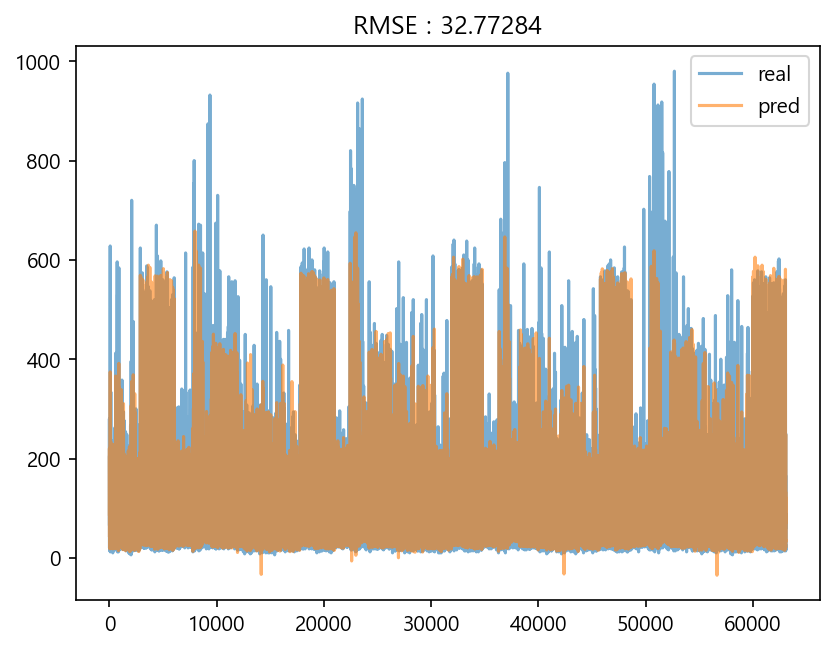

In [83]:
RMSE = rmse(y_valid, y_pred)

# figure 및 ax 생성
fig, ax = plt.subplots(dpi=150)

# 그래프 제목 설정
ax.set_title('RMSE : ' + str(RMSE)[:8])

# 실제 값과 예측 값 그래프 그리기
ax.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
ax.plot(y_pred, alpha=0.6, label='pred')

# 범례 추가
ax.legend()

# 그래프 출력
plt.show()

### 14. 최종 모델 선택 : XGBoost


[0]	validation_0-rmse:54.99631
[10]	validation_0-rmse:37.00261
[20]	validation_0-rmse:35.32440
[30]	validation_0-rmse:34.65770
[40]	validation_0-rmse:33.97588
[50]	validation_0-rmse:33.64609
[60]	validation_0-rmse:33.46740
[70]	validation_0-rmse:33.25797
[80]	validation_0-rmse:33.15821
[90]	validation_0-rmse:33.06828
[100]	validation_0-rmse:33.00256
[110]	validation_0-rmse:32.92503
[120]	validation_0-rmse:32.88462
[130]	validation_0-rmse:32.86510
[140]	validation_0-rmse:32.82980
[150]	validation_0-rmse:32.81173
[160]	validation_0-rmse:32.79511
[170]	validation_0-rmse:32.78296
[180]	validation_0-rmse:32.77793
[181]	validation_0-rmse:32.77906


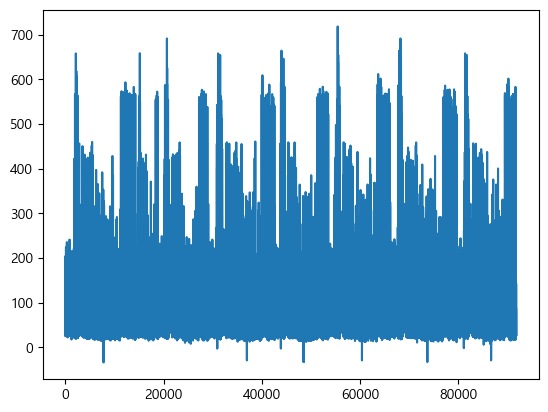

In [84]:
# 1. 모델 정의
final_model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators = 3000, eval_metric = 'rmse', early_stopping_rounds=10)

# 2. 모델 학습
final_model.fit(X_train, y_train, eval_set=[(X_valid,y_valid)], verbose= 10)

# 3. 예측
xgb_predict = final_model.predict(test[features])

# 예측값 시각화
plt.plot(xgb_predict)
plt.show()

### 15.제출 파일 생성 및 제출


In [85]:
submission['next_arrive_time'] = xgb_predict
submission.to_csv('data/bus/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')